In [1]:
# Importing required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

import os
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures


pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

import warnings
warnings.filterwarnings('ignore')

### 1.Data Understanding

In [2]:
#Reading the dataset
df = pd.read_csv("train.csv" ,encoding='utf-8')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#checking dataset dimension
df.shape

(1460, 81)

In [4]:
#checking column datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
#describing dataset
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
#checking null values percentage
round(100*(df.isnull().sum()/len(df.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [7]:
#checking duplicates
sum(df.duplicated(subset = 'Id')) == 0

True

In [8]:
# Checking for null percentage
round(100*(df.isnull().sum()/len(df.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [9]:
# As there are multiple columns with high null value so grouping them together

df.columns[df.isnull().any()] 
null_values = round(100*(df.isnull().sum()/len(df.index)), 2)
null_values = null_values[null_values>0]
null_values.sort_values(inplace=True, ascending=False)
null_values

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64

### 2.Data Cleaning

In [10]:
#Replacing nulls with 'None' where null implies absence of feature.
#Hence, we will first impute the categorical variables with 'None'

null_cat = ["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", 
                     "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond",
                     "PoolQC", "Fence", "MiscFeature"]
for i in null_cat:
    df[i].fillna("none", inplace=True)

In [11]:
#checking null value percentage once again
df.columns[df.isnull().any()] 
null_values = round(100*(df.isnull().sum()/len(df.index)), 2)
null_values = null_values[null_values>0]
null_values.sort_values(inplace=True, ascending=False)
null_values

LotFrontage    17.74
GarageYrBlt     5.55
MasVnrArea      0.55
Electrical      0.07
dtype: float64

In [12]:
#checking above columns individually
print(df['LotFrontage'].describe())
print(df['GarageYrBlt'].describe())
print(df['MasVnrArea'].describe())
print(df['Electrical'].describe())

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64
count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64
count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object


In [13]:
#Imputing the null values with median values as mean & median values are close to each other 
# Since LotFrontage is a numeric with a fair distribution, it can be imputed with similar 'Neighborhood' values
df["GarageYrBlt"].fillna(df["GarageYrBlt"].median(), inplace=True)
df["MasVnrArea"].fillna(df["MasVnrArea"].median(), inplace=True)
df['LotFrontage'] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
df["Electrical"].dropna(inplace=True)

In [14]:
#checking columns once again
print(df['LotFrontage'].describe())
print(df['GarageYrBlt'].describe())
print(df['MasVnrArea'].describe())
print(df['Electrical'].describe())

count    1460.000000
mean       70.199658
std        22.431902
min        21.000000
25%        60.000000
50%        70.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
count    1460.000000
mean     1978.589041
std        23.997022
min      1900.000000
25%      1962.000000
50%      1980.000000
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64
count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64
count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object


In [15]:
#Performing EDA on cleaned data
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [16]:
# Dropping ID Column
df_numeric = df_numeric.drop(['Id'], axis=1)
df_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


#### Plotting target variable 'sales price' with few select columns

Text(0.5, 1.0, 'Sales Price vs Overall Quality')

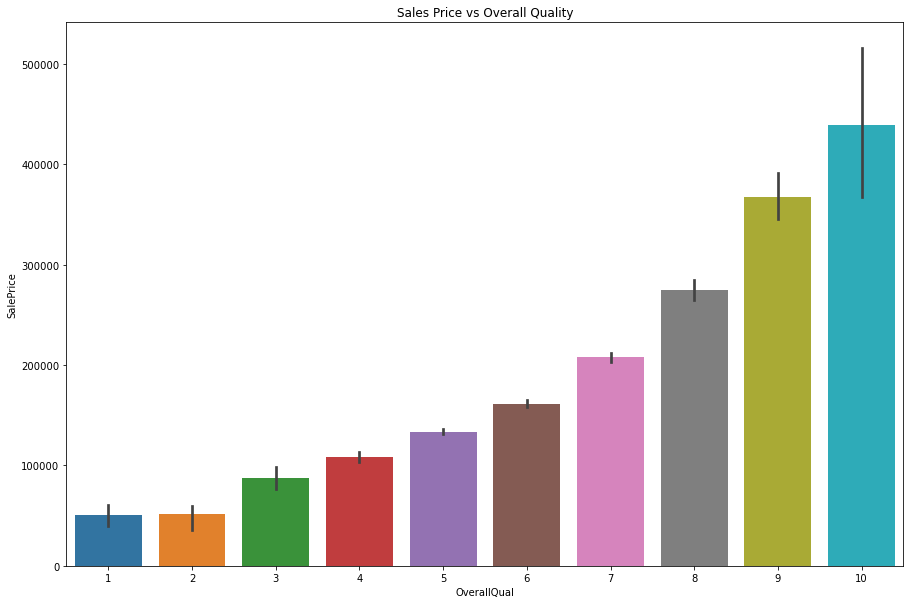

In [17]:
# plotting 'overall quality' with respect to 'Saleprice'
plt.figure(figsize=(15, 10))
sns.barplot(x="OverallQual", y="SalePrice", data= df)
plt.title("Sales Price vs Overall Quality")

**Inference:** With increase in overall Quality sale Price also increases.

Text(0.5, 1.0, 'Sales Price vs Neighbourhood')

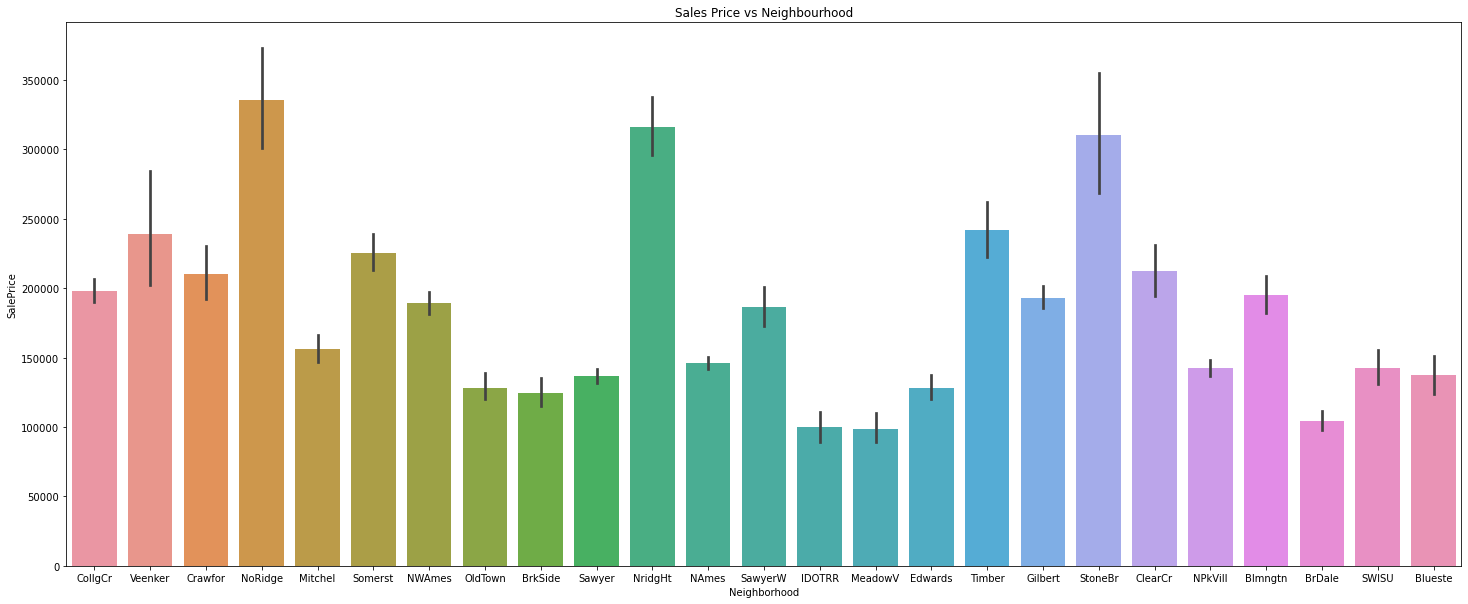

In [18]:
# plotting 'Neighborhood' with respect to 'Sale Price'
plt.figure(figsize=(25, 10))
sns.barplot(x="Neighborhood", y="SalePrice", data= df)
plt.title("Sales Price vs Neighbourhood")

**Inference:** we can see that some neighborhood are high priced.

Text(0.5, 1.0, 'Sales Price vs Overall Condition')

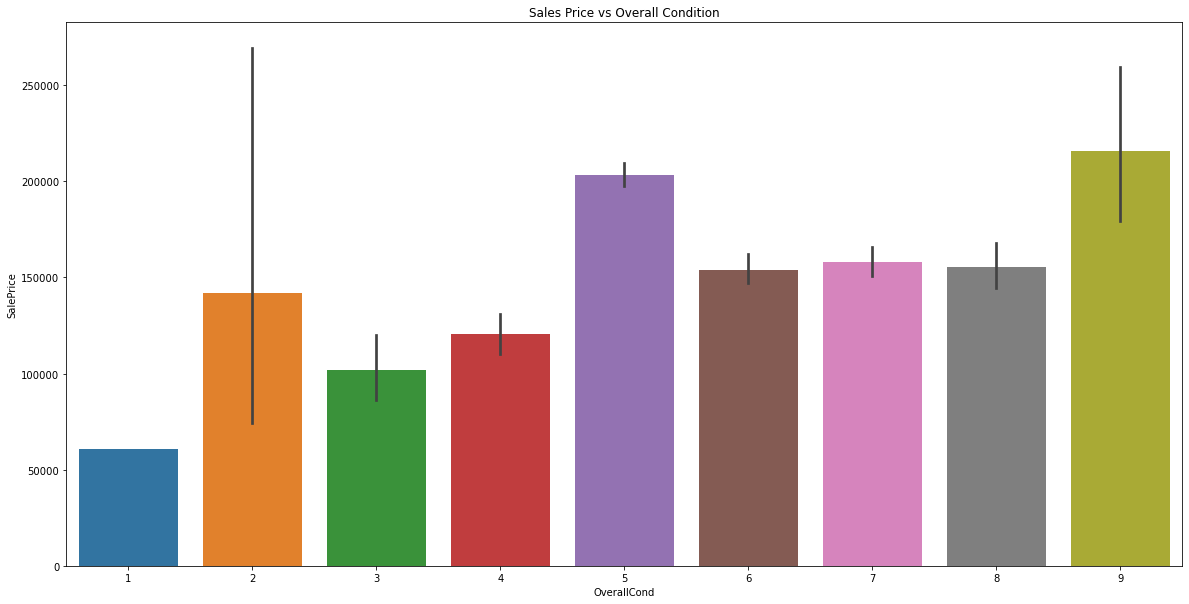

In [19]:
# plotting 'overall condition' with respect to 'Saleprice'
plt.figure(figsize=(20, 10))
sns.barplot(x="OverallCond", y="SalePrice", data= df)
plt.title("Sales Price vs Overall Condition")

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

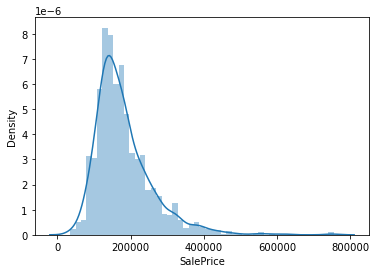

In [20]:
#Plotting displot for Sale Price
sns.distplot(df['SalePrice'])

**Inference:** Clearly the Saleprice figures are skewed towards left so applying log transformation to obtain a centralized data

In [21]:
#Log Transformation for SalePrice
df['SalePrice']=np.log1p(df['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

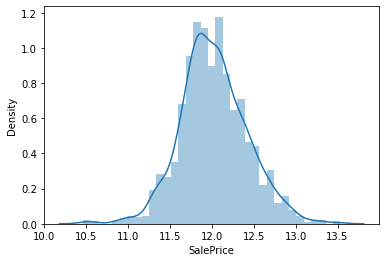

In [22]:
#checking again with displot
sns.distplot(df['SalePrice'])

**Inference:** So after Log transformation we see that salePrice is normally distributed.

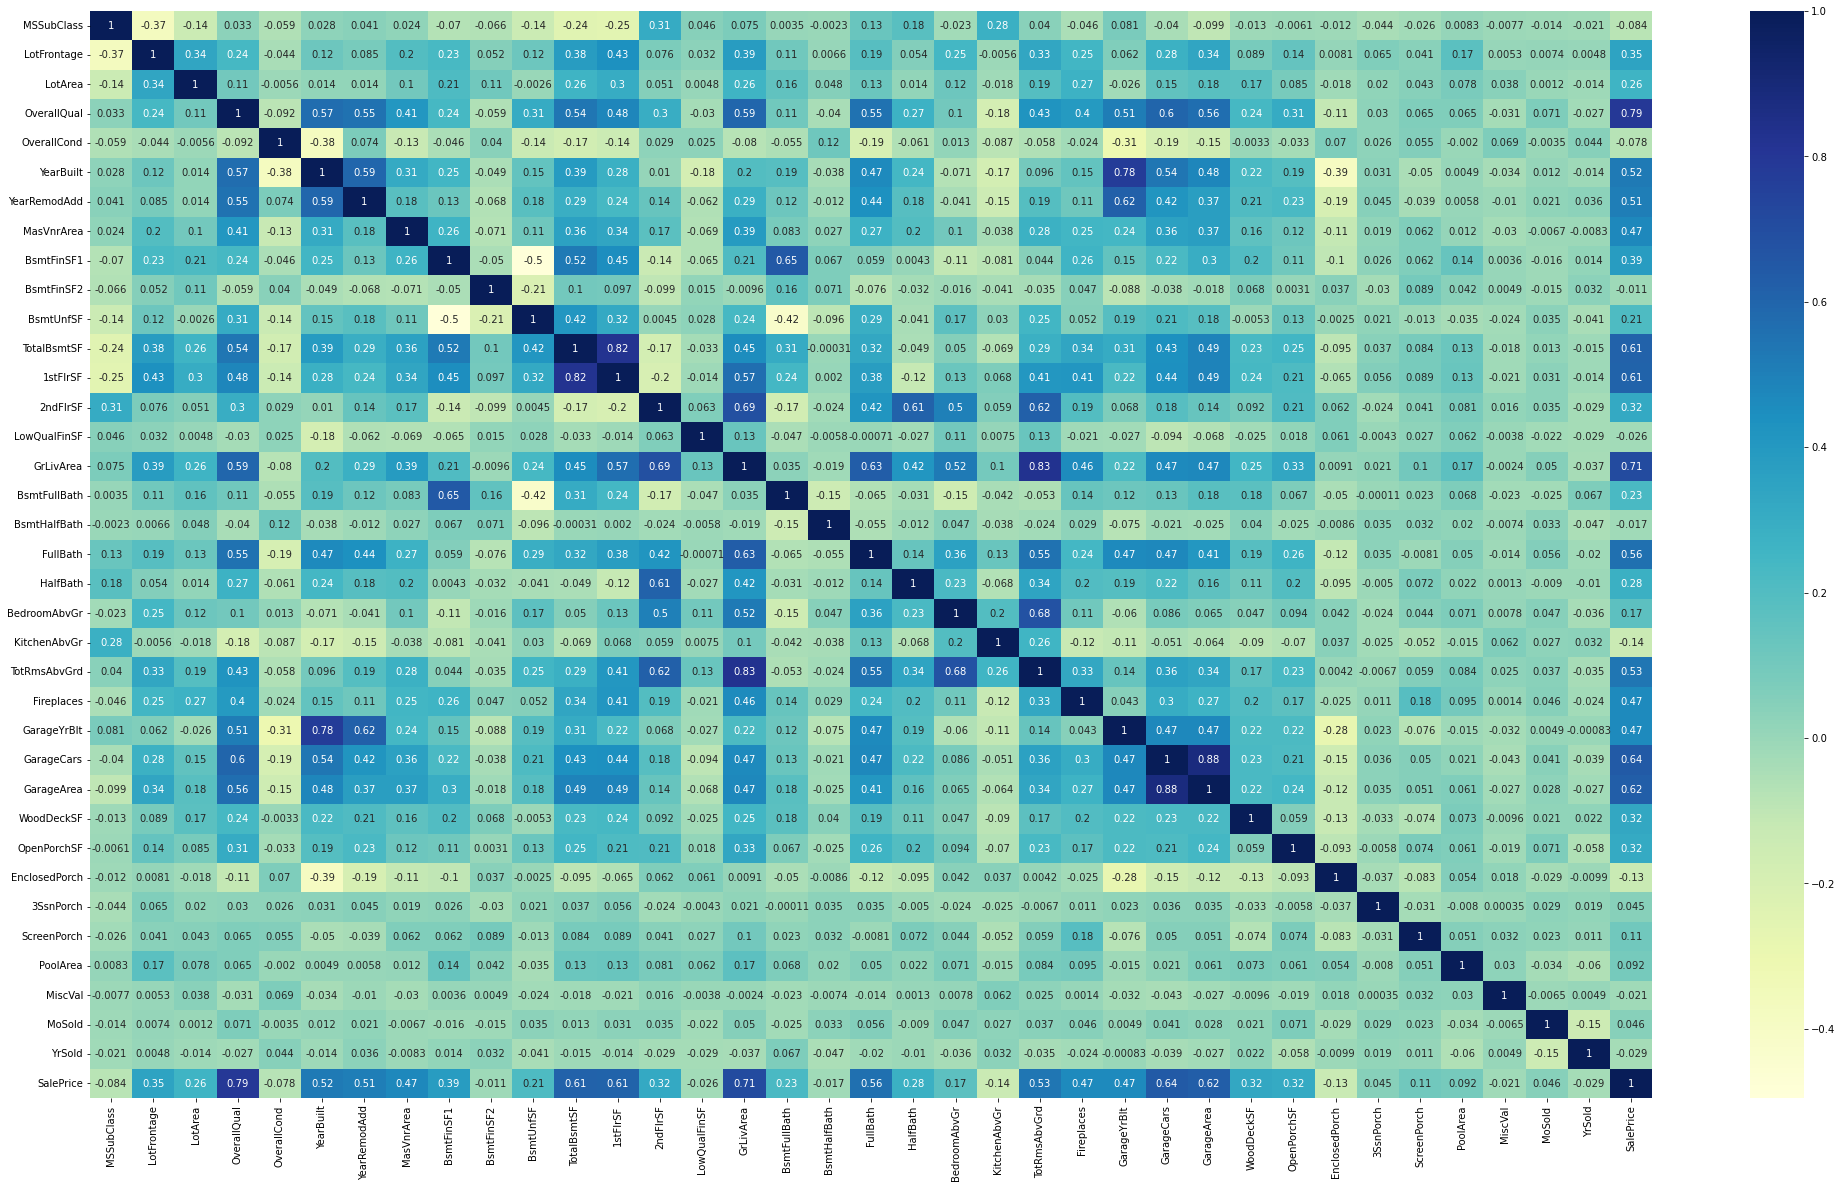

In [23]:
# correlation matrix & Heatmap plot
df_cor = df_numeric.corr()

#heatmap plot
plt.figure(figsize=(35,20))

sns.heatmap(df_cor, cmap="YlGnBu", annot=True)
plt.show()

**Inference:** As we can see some of the variables are correlated and before dropping them we need to check their predictive power with pairplot.

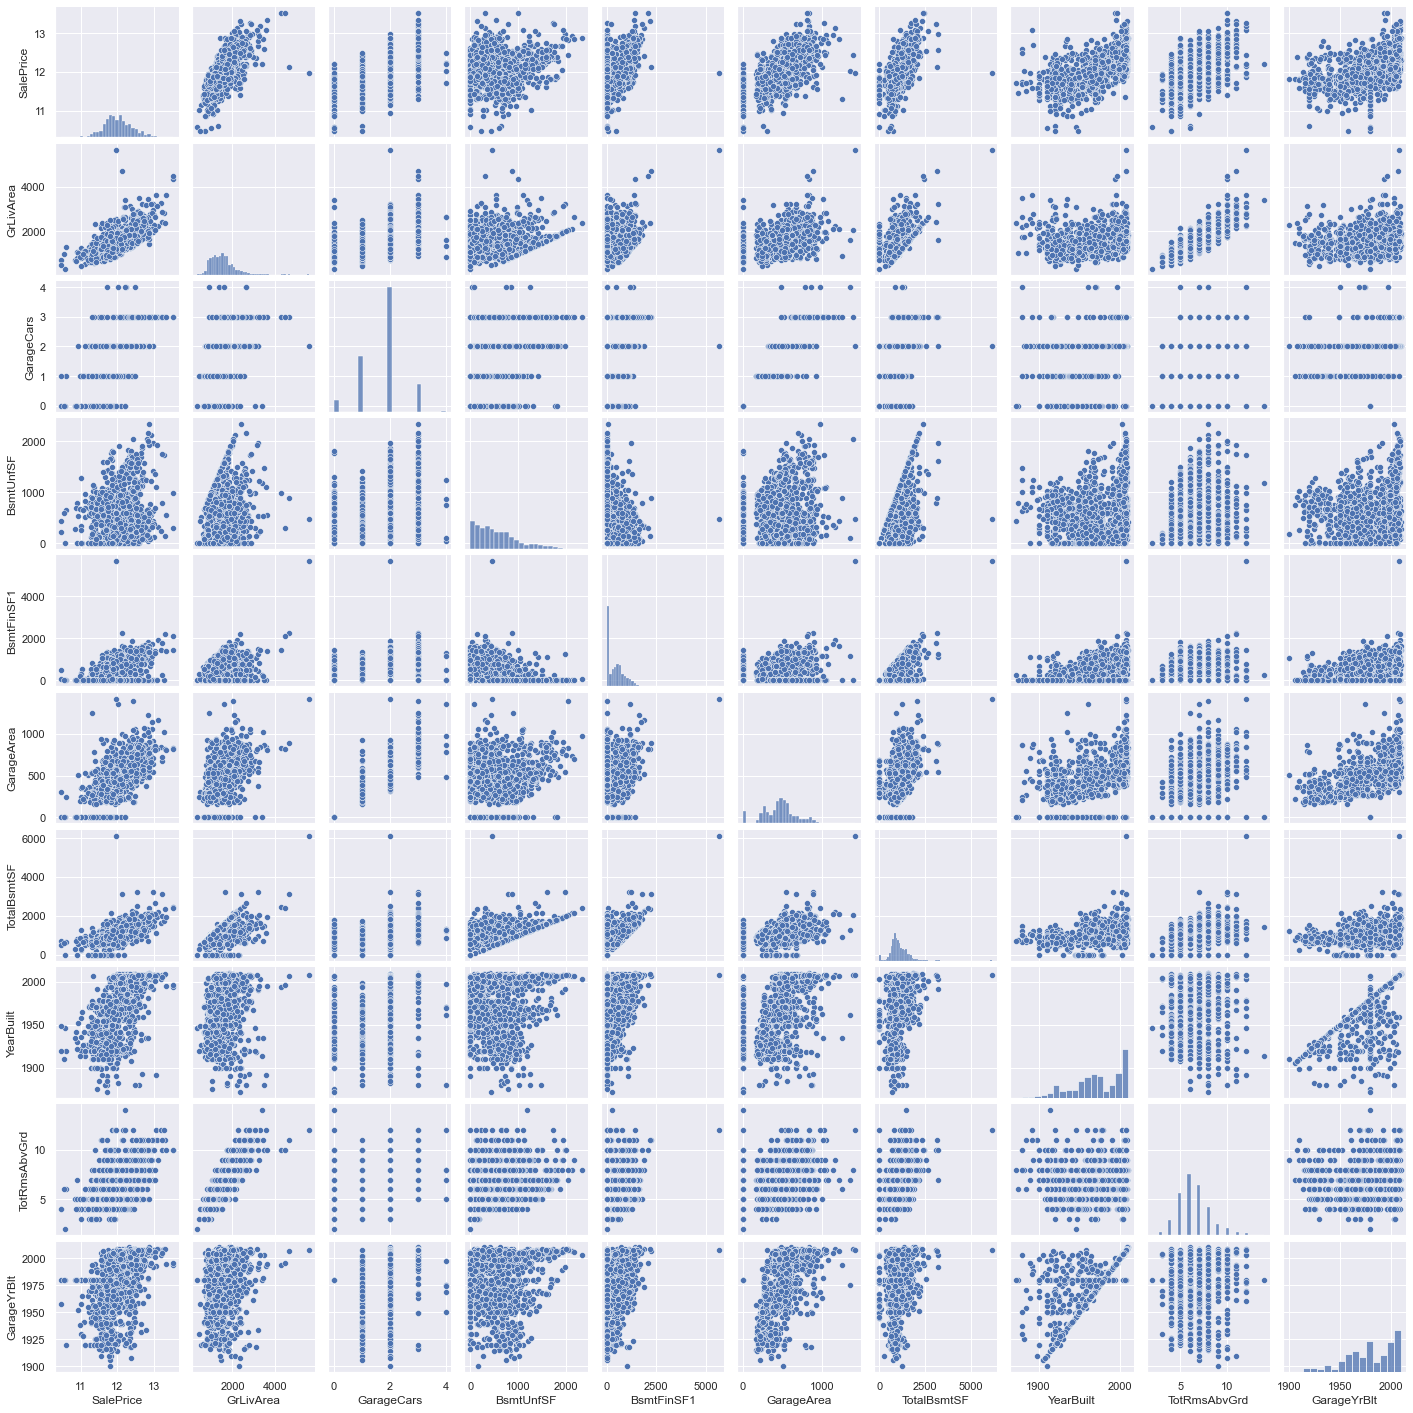

In [24]:
#checking correlated variables with pairplot
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 
        'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(df[cols] ,height = 2)
plt.show()

In [25]:
#Dropping columns that are correlated and not contributing significantly to 'SalePrice'
df = df.drop(['GarageCars'], axis = 1)
df = df.drop(['BsmtUnfSF'], axis = 1)
df = df.drop(['TotRmsAbvGrd'], axis = 1)
df = df.drop(['GarageYrBlt'], axis = 1)    

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,Typ,0,none,Attchd,RFn,548,TA,TA,Y,0,61,0,0,0,0,none,none,none,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,RFn,460,TA,TA,Y,298,0,0,0,0,0,none,none,none,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,none,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,RFn,608,TA,TA,Y,0,42,0,0,0,0,none,none,none,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,none,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,Unf,642,TA,TA,Y,0,35,272,0,0,0,none,none,none,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,none,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,RFn,836,TA,TA,Y,192,84,0,0,0,0,none,none,none,0,12,2008,WD,Normal,12.429220


In [26]:
#Checking the dataset shape now
df.shape

(1460, 77)

#### Derived feature:

In [27]:
#Deriving column for 'Age of property' when it was sold 
df['Age_of_property'] = (df['YrSold'] - df['YearBuilt'])
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age_of_property
0,1,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,Typ,0,none,Attchd,RFn,548,TA,TA,Y,0,61,0,0,0,0,none,none,none,0,2,2008,WD,Normal,12.247699,5
1,2,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,RFn,460,TA,TA,Y,298,0,0,0,0,0,none,none,none,0,5,2007,WD,Normal,12.109016,31
2,3,60,RL,68.0,11250,Pave,none,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,RFn,608,TA,TA,Y,0,42,0,0,0,0,none,none,none,0,9,2008,WD,Normal,12.317171,7
3,4,70,RL,60.0,9550,Pave,none,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,Unf,642,TA,TA,Y,0,35,272,0,0,0,none,none,none,0,2,2006,WD,Abnorml,11.849405,91
4,5,60,RL,84.0,14260,Pave,none,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,RFn,836,TA,TA,Y,192,84,0,0,0,0,none,none,none,0,12,2008,WD,Normal,12.429220,8


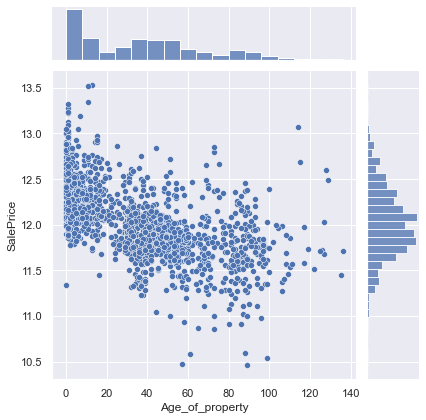

In [28]:
# Age_of_property vs SalePrice
sns.jointplot(x = df['Age_of_property'], y = df['SalePrice'])
plt.show()

**Inference:** As we can see increase in property age shows decrease in Sale Price.

In [29]:
#Also we can drop columns: Month sold and Year Sold, Year built and Year remodelled now as it will not required further
df = df.drop(['MoSold'], axis = 1)
df = df.drop(['YrSold'], axis = 1)
df = df.drop(['YearBuilt'], axis = 1)
df = df.drop(['YearRemodAdd'], axis = 1)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,Age_of_property
0,1,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,Typ,0,none,Attchd,RFn,548,TA,TA,Y,0,61,0,0,0,0,none,none,none,0,WD,Normal,12.247699,5
1,2,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,RFn,460,TA,TA,Y,298,0,0,0,0,0,none,none,none,0,WD,Normal,12.109016,31
2,3,60,RL,68.0,11250,Pave,none,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,RFn,608,TA,TA,Y,0,42,0,0,0,0,none,none,none,0,WD,Normal,12.317171,7
3,4,70,RL,60.0,9550,Pave,none,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,Unf,642,TA,TA,Y,0,35,272,0,0,0,none,none,none,0,WD,Abnorml,11.849405,91
4,5,60,RL,84.0,14260,Pave,none,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,RFn,836,TA,TA,Y,192,84,0,0,0,0,none,none,none,0,WD,Normal,12.429220,8


In [30]:
#Checking new shape of dataset
df.shape

(1460, 74)

In [31]:
#checking variance for some columns
print(df.Street.value_counts())
print(df.Utilities.value_counts())

Pave    1454
Grvl       6
Name: Street, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


In [32]:
# So we can drop above columns due to very low variance and thus not required for predictions
df = df.drop(['Street'], axis = 1)
df = df.drop(['Utilities'], axis = 1)

In [33]:
#Checking new shape of dataset
df.shape

(1460, 72)

In [34]:
#checking variance for few more numeric columns
variance_check=df.select_dtypes(include=['float64', 'int64'])
for i in variance_check:
    print(df[i].value_counts())

1       1
982     1
980     1
979     1
978     1
       ..
485     1
484     1
483     1
482     1
1460    1
Name: Id, Length: 1460, dtype: int64
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
60.0     152
80.0     112
70.0      94
65.0      74
73.0      70
        ... 
137.0      1
140.0      1
38.0       1
150.0      1
46.0       1
Name: LotFrontage, Length: 115, dtype: int64
7200     25
9600     24
6000     17
9000     14
8400     14
         ..
14601     1
13682     1
4058      1
17104     1
9717      1
Name: LotArea, Length: 1073, dtype: int64
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64
0.0      869
180.0      8
72.0       8
108.0      

In [35]:
#Dropping columns which shows very low variance
df = df.drop(['PoolQC','MiscVal', 'Alley', 'RoofMatl', 'Condition2', 'Heating', 'GarageCond', 'Fence', 'Functional' ], axis = 1)

In [36]:
#final shape of our dataset
df.shape

(1460, 63)

### 3.Data Preparation

**Preparing data for model building**

In [37]:
#Dropping 'Id' column from dataset
df = df.drop(['Id'], axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,SaleType,SaleCondition,SalePrice,Age_of_property
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,856,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,0,none,Attchd,RFn,548,TA,Y,0,61,0,0,0,0,none,WD,Normal,12.247699,5
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,1262,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,1,TA,Attchd,RFn,460,TA,Y,298,0,0,0,0,0,none,WD,Normal,12.109016,31
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,920,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,1,TA,Attchd,RFn,608,TA,Y,0,42,0,0,0,0,none,WD,Normal,12.317171,7
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,756,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,1,Gd,Detchd,Unf,642,TA,Y,0,35,272,0,0,0,none,WD,Abnorml,11.849405,91
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,1145,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,1,TA,Attchd,RFn,836,TA,Y,192,84,0,0,0,0,none,WD,Normal,12.429220,8


In [38]:
#Checking type of each feature for dataset:int ,float ,object
types = df.dtypes
#numerical values are either type int or float
numeric_type = types[(types == 'int64') | (types == float)] 
#categorical values are type object
categorical_type = types[types == object]

In [39]:
#Converting numeric columns to a list
numerical_columns = list(numeric_type.index)
print(numerical_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'SalePrice', 'Age_of_property']


In [40]:
#Converting categorical columns to a list
categorical_columns = list(categorical_type.index)
print(categorical_columns)

['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition']


#### Creating Dummy columns to convert categorical into numerical

In [41]:
df = pd.get_dummies(df, drop_first=True )
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice,Age_of_property,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,...,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_none,PavedDrive_P,PavedDrive_Y,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_none,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,856,856,854,0,1710,1,0,2,1,3,1,0,548,0,61,0,0,0,0,12.247699,5,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,1262,1262,0,0,1262,0,1,2,0,3,1,1,460,298,0,0,0,0,0,12.109016,31,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,920,920,866,0,1786,1,0,2,1,3,1,1,608,0,42,0,0,0,0,12.317171,7,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,756,961,756,0,1717,1,0,1,0,3,1,1,642,0,35,272,0,0,0,11.849405,91,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,1145,1145,1053,0,2198,1,0,2,1,4,1,1,836,192,84,0,0,0,0,12.429220,8,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [42]:
#Defining X & y for model building
X = df.drop(['SalePrice'], axis=1)

X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Age_of_property,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,...,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_none,PavedDrive_P,PavedDrive_Y,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_none,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,856,856,854,0,1710,1,0,2,1,3,1,0,548,0,61,0,0,0,0,5,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,1262,1262,0,0,1262,0,1,2,0,3,1,1,460,298,0,0,0,0,0,31,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,920,920,866,0,1786,1,0,2,1,3,1,1,608,0,42,0,0,0,0,7,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,756,961,756,0,1717,1,0,1,0,3,1,1,642,0,35,272,0,0,0,91,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,1145,1145,1053,0,2198,1,0,2,1,4,1,1,836,192,84,0,0,0,0,8,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [43]:
# Assigning response variable to y
y = df['SalePrice']

y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

#### Test-Train Split

In [44]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

#### Scaling

In [45]:
#Importing necessary library
from sklearn.preprocessing import StandardScaler

In [46]:
#Scaling numerical columns
scaler = StandardScaler()

X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1',
         'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 
         'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 
         'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']] = scaler.fit_transform(X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 
                              'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 
                              'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                              'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
                              'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'Age_of_property']])


X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1',
         'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 
         'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 
         'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']] = scaler.fit_transform(X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 
                              'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 
                              'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                              'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
                              'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'Age_of_property']])

#### Checking X train & test data

In [47]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Age_of_property,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,...,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_none,PavedDrive_P,PavedDrive_Y,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_none,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,PropAge
175,-0.870387,0.612765,0.166080,-0.059996,1.252715,-0.575015,0.085426,-0.283127,0.347365,2.572160,-0.797551,-0.121406,1.229791,1.105326,-0.232279,0.786946,-0.751723,1.407703,-0.212991,0.622339,0.478002,-0.740805,-0.261563,0.282917,-0.110736,-0.260661,-0.062302,57,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0.660066
1408,0.304785,-0.432534,-0.261043,-1.501313,1.252715,-0.575015,-0.943351,-0.283127,-0.973680,-1.069794,0.630928,-0.121406,-0.279140,-0.807450,-0.232279,-1.006519,-0.751723,0.176114,-0.212991,-0.935034,0.256615,-0.740805,-0.721923,-0.358041,-0.110736,3.016768,-0.062302,100,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,2.066739
1148,-0.165284,-0.432534,-0.439778,0.660663,1.252715,-0.575015,-0.943351,-0.283127,-1.087563,-1.504156,0.440311,-0.121406,-0.757443,-0.807450,-0.232279,-1.006519,-0.751723,-1.055475,-0.212991,0.622339,-0.850325,-0.740805,-0.721923,2.534487,-0.110736,-0.260661,-0.062302,82,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1.477899
861,3.125199,0.220778,0.079341,-0.780655,-1.406374,-0.575015,0.870488,-0.283127,-0.023894,-0.303879,-0.797551,-0.121406,-0.894101,1.105326,-0.232279,-1.006519,1.246998,0.176114,-0.212991,-0.935034,0.145921,-0.740805,-0.721923,-0.358041,-0.110736,-0.260661,-0.062302,45,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0.267506
220,-0.870387,0.133670,-0.151525,0.660663,-0.520011,-0.575015,-0.943351,-0.283127,1.021554,0.875837,-0.797551,-0.121406,-0.022906,-0.807450,-0.232279,0.786946,-0.751723,-1.055475,-0.212991,-0.935034,0.934615,2.124358,-0.198065,-0.358041,-0.110736,-0.260661,-0.062302,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,-1.204594


In [48]:
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Age_of_property,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,...,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_none,PavedDrive_P,PavedDrive_Y,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_none,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,PropAge
930,-0.879672,0.106932,-0.211538,1.358461,-0.509551,-0.560080,-1.009468,-0.301886,0.899165,0.771223,-0.791130,-0.119344,-0.117457,-0.851855,-0.261329,0.798671,-0.786336,0.135738,-0.208108,-0.987888,0.657098,-0.019795,-0.427207,-0.362773,-0.128962,-0.293788,-0.082098,2,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,-1.150291
530,0.559791,0.676372,0.029981,-0.099887,-0.509551,0.597117,0.743814,-0.301886,0.887692,0.884656,-0.791130,-0.119344,-0.035051,1.111895,-0.261329,0.798671,-0.786336,0.135738,-0.208108,0.551952,0.608692,0.924930,-0.673305,-0.362773,-0.128962,-0.293788,-0.082098,20,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,-0.539797
1291,2.479076,-2.360638,-1.583933,-0.829061,1.350309,0.856033,-0.518001,-0.301886,-1.019124,-1.434127,0.740428,-0.119344,-0.431748,-0.851855,-0.261329,0.798671,1.181751,0.135738,-0.208108,-0.987888,-1.017758,0.627799,-0.673305,-0.362773,-0.128962,-0.293788,-0.082098,37,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0.036781
1385,-0.159940,-1.459026,-0.872447,-1.558235,2.280239,-0.560080,0.634091,-0.301886,-0.638220,-0.996222,0.024789,-0.119344,-0.715377,1.111895,-0.261329,-1.072013,-0.786336,0.135738,-0.208108,-0.987888,-1.133933,-0.781670,0.639219,-0.362773,-0.128962,-0.293788,-0.082098,88,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1.766516
305,-0.879672,0.439105,0.065215,1.358461,-0.509551,0.739785,2.300508,-0.301886,2.124484,2.179903,-0.791130,-0.119344,0.905907,1.111895,-0.261329,0.798671,-0.786336,0.135738,-0.208108,-0.987888,2.002793,0.498280,-0.673305,-0.362773,-0.128962,-0.293788,-0.082098,3,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,-1.116375


### 4.Model Building and Evaluation

#### Model evaluation using Linear Regression and RFE

In [49]:
# Importing RFE and LinearRegression libraries
# As there are more variables to be analysed, we can use automated feature elimination process (RFE)

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [50]:
# As number of variables for analysis is more than 250, we will run RFE to select some that have high
#predictive power
lm = LinearRegression()
lm.fit(X_train, y_train)
# Running RFE for top 100 variables
rfe = RFE(lm, 100)            
rfe = rfe.fit(X_train, y_train)

In [51]:
# Checking the ranks
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 86),
 ('LotFrontage', False, 81),
 ('LotArea', False, 25),
 ('OverallQual', True, 1),
 ('OverallCond', False, 2),
 ('MasVnrArea', False, 94),
 ('BsmtFinSF1', False, 46),
 ('BsmtFinSF2', False, 92),
 ('TotalBsmtSF', False, 100),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 44),
 ('BsmtHalfBath', False, 108),
 ('FullBath', False, 41),
 ('HalfBath', False, 51),
 ('BedroomAbvGr', False, 72),
 ('KitchenAbvGr', False, 70),
 ('Fireplaces', False, 74),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 82),
 ('OpenPorchSF', False, 97),
 ('EnclosedPorch', False, 84),
 ('3SsnPorch', False, 89),
 ('ScreenPorch', False, 77),
 ('PoolArea', False, 65),
 ('Age_of_property', False, 107),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 52),
 ('LotShape_IR3', True, 1),
 ('LotShape_Reg', False, 88),
 ('LandContour_HLS', 

In [52]:
# #selected columns from rfe
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'GarageArea', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LotShape_IR3', 'LandContour_HLS', 'LandContour_Lvl',
       'LotConfig_CulDSac', 'LotConfig_FR3', 'LandSlope_Mod', 'LandSlope_Sev',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_Sawyer', 'Neighborhood_StoneBr', 'Condition1_Norm',
       'Condition1_PosN', 'Condition1_RRAn', 'Condition1_RRNn',
       'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_2.5Fin',
       'RoofStyle_Gable', 'RoofStyle_Hip', 'RoofStyle_Mansard',
       'Exterior1st_BrkComm', 'Exterior1st_BrkFa

In [53]:
#skipped columns from rfe

X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath',
       ...
       'PavedDrive_Y', 'MiscFeature_Shed', 'MiscFeature_TenC',
       'MiscFeature_none', 'SaleType_CWD', 'SaleType_ConLI', 'SaleType_ConLw',
       'SaleType_WD', 'SaleCondition_Family', 'PropAge'],
      dtype='object', length=112)

In [54]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [55]:
X_train_rfe = pd.DataFrame(X_train[col])

In [56]:
X_train_rfe.head()

,OverallQual,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR3,LandContour_HLS,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR3,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_StoneBr,Condition1_Norm,Condition1_PosN,Condition1_RRAn,Condition1_RRNn,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_2.5Fin,RoofStyle_Gable,RoofStyle_Hip,RoofStyle_Mansard,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_WdShing,Exterior2nd_Brk Cmn,Exterior2nd_CBlock,Exterior2nd_CmentBd,MasVnrType_none,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_none,BsmtCond_none,BsmtExposure_Gd,BsmtFinType1_LwQ,BsmtFinType1_Unf,BsmtFinType1_none,BsmtFinType2_BLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_none,HeatingQC_Po,CentralAir_Y,Electrical_FuseP,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageType_none,GarageFinish_none,GarageQual_none,MiscFeature_Othr,SaleType_Con,SaleType_ConLD,SaleType_New,SaleType_Oth,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Normal,SaleCondition_Partial
175,-0.059996,2.572160,-0.797551,-0.121406,1.229791,0.478002,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1408,-1.501313,-1.069794,0.630928,-0.121406,-0.279140,0.256615,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1148,0.660663,-1.504156,0.440311,-0.121406,-0.757443,-0.850325,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
861,-0.780655,-0.303879,-0.797551,-0.121406,-0.894101,0.145921,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
220,0.660663,0.875837,-0.797551,-0.121406,-0.022906,0.934615,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [57]:
#Xtrain data shape
X_train_rfe.shape

(1021, 100)

In [58]:
# Making predictions & evalate model with r2 score

y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.9277652954573824

In [59]:
#Test data prediction & test data r2 score

y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

0.8594214935641118

### Lasso and Ridge Regression

#### Predicting house prices using Lasso & Ridge Regression

### Lasso Regression:

In [60]:
#Xtrain dimension
X_train.shape

(1021, 212)

In [61]:
#ytrain dimension
y_train.shape

(1021,)

In [62]:
# Applying Lasso Regression

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# Cross Validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [63]:
# Checking cv_results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.089786,0.006882,0.001759,0.000312,0.0001,{'alpha': 0.0001},-0.101114,-0.083296,-0.102220,-0.103814,-0.095380,-0.097165,0.007495,2,-0.071990,-0.077602,-0.073122,-0.064542,-0.072709,-0.071993,0.004213
1,0.018194,0.002556,0.001469,0.000045,0.001,{'alpha': 0.001},-0.091152,-0.084554,-0.097126,-0.103474,-0.085086,-0.092279,0.007232,1,-0.081919,-0.084904,-0.081130,-0.073938,-0.082302,-0.080839,0.003675
2,0.004847,0.000176,0.001474,0.000069,0.01,{'alpha': 0.01},-0.104537,-0.097685,-0.100446,-0.111508,-0.091955,-0.101226,0.006569,3,-0.100111,-0.102344,-0.099267,-0.087890,-0.101356,-0.098194,0.005258
3,0.003596,0.000080,0.001409,0.000008,0.05,{'alpha': 0.05},-0.131832,-0.124561,-0.127897,-0.136190,-0.114955,-0.127087,0.007206,4,-0.125949,-0.129981,-0.127755,-0.117463,-0.130611,-0.126352,0.004742
4,0.003501,0.000016,0.001408,0.000005,0.1,{'alpha': 0.1},-0.163045,-0.163475,-0.161597,-0.177884,-0.146539,-0.162508,0.009935,5,-0.160842,-0.162844,-0.162027,-0.158259,-0.165714,-0.161937,0.002442


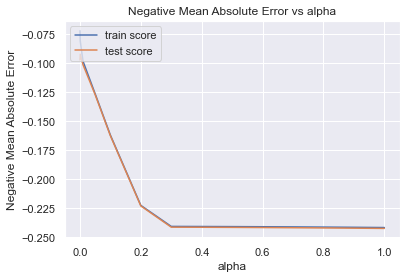

In [64]:
# plotting mean train and test scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error vs alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

**Inference:** Negative Mean Absolute Error is quite low at alpha = 0.3 and stabilises thereafter, but we will choose a low value of alpha to balance the trade-off between Bias-Variance and to get the coefficients of smallest of features.

In [65]:
# Taking alpha = 0.01, even the smallest of negative coefficients that have some predictive power towards 'SalePrice' will be generated

alpha = 0.01
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-0.02088158,  0.        ,  0.0161764 ,  0.12169456,  0.05501925,
        0.        ,  0.0042304 ,  0.        ,  0.01405152,  0.0067451 ,
        0.        , -0.        ,  0.12809608,  0.0282747 ,  0.        ,
        0.01262645,  0.        ,  0.        , -0.0032766 ,  0.02728801,
        0.04039086,  0.00714559,  0.        ,  0.        ,  0.        ,
        0.00868354, -0.01922505, -0.0037849 ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.  

**As we see Lasso brings the coefficients of insignificant features to zero.**

In [66]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.158),
 ('MSSubClass', -0.021),
 ('LotFrontage', 0.0),
 ('LotArea', 0.016),
 ('OverallQual', 0.122),
 ('OverallCond', 0.055),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.004),
 ('BsmtFinSF2', 0.0),
 ('TotalBsmtSF', 0.014),
 ('1stFlrSF', 0.007),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.128),
 ('BsmtFullBath', 0.028),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.013),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', -0.003),
 ('Fireplaces', 0.027),
 ('GarageArea', 0.04),
 ('WoodDeckSF', 0.007),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.009),
 ('PoolArea', -0.019),
 ('Age_of_property', -0.004),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.0),
 ('MSZoning_RM', -0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', -0.0),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', 0.0),
 ('LandContour_Lvl', -0.0),
 ('LotConfig_CulDSac', 0.0),
 ('LotConfig_FR2', -0.0),
 ('LotConf

In [67]:
# lasso regression
lm = Lasso(alpha=0.01)
lm.fit(X_train, y_train)

# prediction on train & test set(Using R2)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8601449108340863
0.8504537509321285


**r2 values for train and test matches well, indicating an optimum model.**

In [68]:
#checking RMSE
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.15366554905003207


In [69]:
# Creating a dataframe for the coefficients obtained from Lasso
mod = list(zip(cols, model_parameters))
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para.head()

,Variable,Coeff
0,constant,12.158
1,MSSubClass,-0.021
2,LotFrontage,0.000
3,LotArea,0.016
4,OverallQual,0.122


In [70]:
# sorting the coefficients in ascending order
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
para

,Variable,Coeff
0,constant,12.158
13,GrLivArea,0.128
4,OverallQual,0.122
5,OverallCond,0.055
21,GarageArea,0.040
...,...,...
211,SaleCondition_Partial,0.000
19,KitchenAbvGr,-0.003
28,Age_of_property,-0.004
27,PoolArea,-0.019


In [71]:
# Choosing variables whose coefficients are non-zero
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred

,Variable,Coeff
0,constant,12.158
13,GrLivArea,0.128
4,OverallQual,0.122
5,OverallCond,0.055
21,GarageArea,0.040
14,BsmtFullBath,0.028
20,Fireplaces,0.027
3,LotArea,0.016
9,TotalBsmtSF,0.014
16,FullBath,0.013


In [73]:
#These Variables obtained from Lasso Regression can be concluded to have the strong effect on the SalePrice
pred.shape

(18, 2)

In [74]:
#List of Lasso variables
Lassso_var = list(pred['Variable'])
print(Lassso_var)

['constant', 'GrLivArea', 'OverallQual', 'OverallCond', 'GarageArea', 'BsmtFullBath', 'Fireplaces', 'LotArea', 'TotalBsmtSF', 'FullBath', 'ScreenPorch', '1stFlrSF', 'WoodDeckSF', 'BsmtFinSF1', 'KitchenAbvGr', 'Age_of_property', 'PoolArea', 'MSSubClass']


In [75]:
#Creating Lasso X train dataset
X_train_lasso = X_train[['GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF1',
                         'Fireplaces', 'LotArea', 'LotFrontage', 'BsmtFullBath', 'Foundation_PConc', 'OpenPorchSF',
                         'FullBath', 'ScreenPorch', 'WoodDeckSF']]
                        
X_train_lasso.head()

,GrLivArea,OverallQual,OverallCond,TotalBsmtSF,GarageArea,BsmtFinSF1,Fireplaces,LotArea,LotFrontage,BsmtFullBath,Foundation_PConc,OpenPorchSF,FullBath,ScreenPorch,WoodDeckSF
175,1.229791,-0.059996,1.252715,0.347365,0.478002,0.085426,0.622339,0.166080,0.612765,1.105326,0,-0.261563,0.786946,-0.260661,-0.740805
1408,-0.279140,-1.501313,1.252715,-0.973680,0.256615,-0.943351,-0.935034,-0.261043,-0.432534,-0.807450,0,-0.721923,-1.006519,3.016768,-0.740805
1148,-0.757443,0.660663,1.252715,-1.087563,-0.850325,-0.943351,0.622339,-0.439778,-0.432534,-0.807450,1,-0.721923,-1.006519,-0.260661,-0.740805
861,-0.894101,-0.780655,-1.406374,-0.023894,0.145921,0.870488,-0.935034,0.079341,0.220778,1.105326,1,-0.721923,-1.006519,-0.260661,-0.740805
220,-0.022906,0.660663,-0.520011,1.021554,0.934615,-0.943351,-0.935034,-0.151525,0.133670,-0.807450,1,-0.198065,0.786946,-0.260661,2.124358


In [76]:
#Checking its shape
X_train_lasso.shape

(1021, 15)

In [77]:
#Creating Lasso X test dataset
X_test_lasso = X_test[['GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF1',
                       'Fireplaces', 'LotArea', 'LotFrontage', 'BsmtFullBath', 'Foundation_PConc', 'OpenPorchSF', 
                       'FullBath', 'ScreenPorch', 'WoodDeckSF']]
                        
X_test_lasso.head()

,GrLivArea,OverallQual,OverallCond,TotalBsmtSF,GarageArea,BsmtFinSF1,Fireplaces,LotArea,LotFrontage,BsmtFullBath,Foundation_PConc,OpenPorchSF,FullBath,ScreenPorch,WoodDeckSF
930,-0.117457,1.358461,-0.509551,0.899165,0.657098,-1.009468,-0.987888,-0.211538,0.106932,-0.851855,1,-0.427207,0.798671,-0.293788,-0.019795
530,-0.035051,-0.099887,-0.509551,0.887692,0.608692,0.743814,0.551952,0.029981,0.676372,1.111895,0,-0.673305,0.798671,-0.293788,0.924930
1291,-0.431748,-0.829061,1.350309,-1.019124,-1.017758,-0.518001,-0.987888,-1.583933,-2.360638,-0.851855,0,-0.673305,0.798671,-0.293788,0.627799
1385,-0.715377,-1.558235,2.280239,-0.638220,-1.133933,0.634091,-0.987888,-0.872447,-1.459026,1.111895,0,0.639219,-1.072013,-0.293788,-0.781670
305,0.905907,1.358461,-0.509551,2.124484,2.002793,2.300508,-0.987888,0.065215,0.439105,1.111895,1,-0.673305,0.798671,-0.293788,0.498280


### Ridge Regression:

In [78]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()


# Cross Validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [79]:
# Checking cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009703,0.007670,0.002286,0.000551,0.0001,{'alpha': 0.0001},-0.113055,-0.088533,-0.110225,-0.107806,-0.102843,-0.104492,0.008655,27,-0.070227,-0.075506,-0.071683,-0.062232,-0.071465,-0.070223,0.004369
1,0.005340,0.000526,0.001913,0.000194,0.001,{'alpha': 0.001},-0.113022,-0.088506,-0.110190,-0.107788,-0.102778,-0.104457,0.008655,26,-0.070228,-0.075508,-0.071683,-0.062234,-0.071469,-0.070225,0.004369
2,0.004686,0.000573,0.001592,0.000136,0.01,{'alpha': 0.01},-0.112710,-0.088264,-0.109847,-0.107626,-0.102207,-0.104131,0.008648,25,-0.070240,-0.075533,-0.071682,-0.062255,-0.071509,-0.070244,0.004370
3,0.004462,0.000342,0.001720,0.000214,0.05,{'alpha': 0.05},-0.111515,-0.087334,-0.108641,-0.107098,-0.100599,-0.103037,0.008629,24,-0.070314,-0.075672,-0.071708,-0.062351,-0.071654,-0.070340,0.004378
4,0.004887,0.000629,0.001784,0.000364,0.1,{'alpha': 0.1},-0.110346,-0.086551,-0.107655,-0.106680,-0.099337,-0.102114,0.008594,23,-0.070425,-0.075854,-0.071826,-0.062464,-0.071806,-0.070475,0.004398


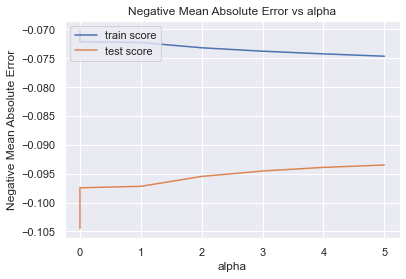

In [80]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error vs alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### As the Negative Mean Absolute Error stabilises at alpha = 2, we will choose this for our further analysis

In [81]:
#Ridge regression at aplha=2
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-1.26493196e-02, -8.17168851e-03,  2.60841756e-02,  7.92728108e-02,
        5.19958825e-02,  2.47096385e-03, -1.10543488e-02,  6.27228079e-03,
       -7.33163230e-03,  4.49886742e-02,  4.36066980e-02,  1.92627791e-03,
        6.94295641e-02,  2.86974331e-02,  2.63780076e-03,  3.22491788e-02,
        1.91521430e-02,  1.47691770e-02, -9.58822912e-03, -7.59064275e-03,
        2.92142878e-02,  9.14670668e-03,  4.76083448e-03,  1.13489045e-02,
        5.41887431e-03,  1.22340389e-02, -1.47971087e-02, -1.39257926e-03,
        1.26362026e-01,  1.34884352e-01,  1.18370897e-01,  8.17824157e-02,
        2.04808617e-02, -8.38724307e-02,  5.01586336e-03,  1.88432508e-02,
        3.72716487e-03,  1.98135010e-02,  2.98382473e-02, -4.19398851e-02,
       -4.78567358e-02, -1.70729591e-02,  1.15160891e-02, -6.24687292e-02,
       -4.25172026e-02, -5.43818389e-02,  1.96387566e-02,  4.67989853e-02,
       -1.86391149e-02,  1.01973723e-01, -9.77632469e-02, -1.98420346e-02,
       -9.10022010e-02, -

In [82]:
# Ridge model parameters

model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.771),
 ('MSSubClass', -0.013),
 ('LotFrontage', -0.008),
 ('LotArea', 0.026),
 ('OverallQual', 0.079),
 ('OverallCond', 0.052),
 ('MasVnrArea', 0.002),
 ('BsmtFinSF1', -0.011),
 ('BsmtFinSF2', 0.006),
 ('TotalBsmtSF', -0.007),
 ('1stFlrSF', 0.045),
 ('2ndFlrSF', 0.044),
 ('LowQualFinSF', 0.002),
 ('GrLivArea', 0.069),
 ('BsmtFullBath', 0.029),
 ('BsmtHalfBath', 0.003),
 ('FullBath', 0.032),
 ('HalfBath', 0.019),
 ('BedroomAbvGr', 0.015),
 ('KitchenAbvGr', -0.01),
 ('Fireplaces', -0.008),
 ('GarageArea', 0.029),
 ('WoodDeckSF', 0.009),
 ('OpenPorchSF', 0.005),
 ('EnclosedPorch', 0.011),
 ('3SsnPorch', 0.005),
 ('ScreenPorch', 0.012),
 ('PoolArea', -0.015),
 ('Age_of_property', -0.001),
 ('MSZoning_FV', 0.126),
 ('MSZoning_RH', 0.135),
 ('MSZoning_RL', 0.118),
 ('MSZoning_RM', 0.082),
 ('LotShape_IR2', 0.02),
 ('LotShape_IR3', -0.084),
 ('LotShape_Reg', 0.005),
 ('LandContour_HLS', 0.019),
 ('LandContour_Low', 0.004),
 ('LandContour_Lvl', 0.02),
 ('LotConfig_CulDSac', 0.

In [83]:
# Ridge Regression
lm = Ridge(alpha=2)
lm.fit(X_train, y_train)

# predicting train & test r2 scores
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9231705765215246
0.8753740249480416


In [84]:
#Checking RMSE value
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.14027912051095195


#### We can see that Ridge model performance is better than Lasso. The train and the test scores are also matching well.

In [85]:
# Creating a dataframe for Ridge Coefficients
mod_ridge = list(zip(cols, model_parameters))

In [86]:
#Ridge dataframe
paraRFE = pd.DataFrame(mod_ridge)
paraRFE.columns = ['Variable', 'Coeff']
res=paraRFE.sort_values(by=['Coeff'], ascending = False)
res.head(20)

,Variable,Coeff
0,constant,11.771
30,MSZoning_RH,0.135
29,MSZoning_FV,0.126
31,MSZoning_RL,0.118
205,SaleType_Oth,0.103
50,Neighborhood_Crawfor,0.102
136,Foundation_Stone,0.101
66,Neighborhood_StoneBr,0.101
95,Exterior1st_BrkFace,0.100
111,Exterior2nd_CmentBd,0.089


In [87]:
# Sorting the coefficients in ascending order
paraRFE = paraRFE.sort_values((['Coeff']), axis = 0, ascending = False)
paraRFE

,Variable,Coeff
0,constant,11.771
30,MSZoning_RH,0.135
29,MSZoning_FV,0.126
31,MSZoning_RL,0.118
205,SaleType_Oth,0.103
...,...,...
79,BldgType_Twnhs,-0.094
83,HouseStyle_2.5Fin,-0.096
51,Neighborhood_Edwards,-0.098
94,Exterior1st_BrkComm,-0.103


In [88]:
## As there were few coefficients at 0, we will remove them from features
predRFE = pd.DataFrame(paraRFE[(paraRFE['Coeff'] != 0)])
predRFE

,Variable,Coeff
0,constant,11.771
30,MSZoning_RH,0.135
29,MSZoning_FV,0.126
31,MSZoning_RL,0.118
205,SaleType_Oth,0.103
...,...,...
79,BldgType_Twnhs,-0.094
83,HouseStyle_2.5Fin,-0.096
51,Neighborhood_Edwards,-0.098
94,Exterior1st_BrkComm,-0.103


In [89]:
#checking the dimension now
predRFE.shape

(207, 2)

### 5.Observations

**Though the model performance by Ridge Regression was better in terms of R2 values of Train and Test, it is better to use Lasso, since it brings and assigns a zero value to insignificant features, enabling us to choose the predictive variables. It is always advisable to use simple yet robust model.**

In [90]:
#Equation formulated using the features and coefficients obtained by Lasso
pred.set_index(pd.Index(['C','x1', 'x2', 'x3', 'x4', 'x5' , 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 
                         'x13', 'x14', 'x15', 'x16','x17']), inplace = True) 
pred

,Variable,Coeff
C,constant,12.158
x1,GrLivArea,0.128
x2,OverallQual,0.122
x3,OverallCond,0.055
x4,GarageArea,0.040
x5,BsmtFullBath,0.028
x6,Fireplaces,0.027
x7,LotArea,0.016
x8,TotalBsmtSF,0.014
x9,FullBath,0.013


**The final features that should be selected for predicting the price of house is as below:**

**Equation:**

**Log(Y) = C + 0.128(x1) + 0.122(x2) + 0.055(x3) + 0.040(x4) + 0.028(x5) + 0.027(x6) + 0.016(x7) + 0.014(x8) + 0.013(x9) + 0.009(x10)+ 0.007(x11) + 0.007(x12) + 0.004(x13) - 0.003(x14) - 0.004(x15) - 0.019(x16) -0.021(x17) + Error term(RSS + alpha * (sum of absolute value of coefficients)**

### 6.Conclusion :

1. Score for both Ridge and Lasso regression.
 - Ridge : Train :92.31 Test :87.54
 - Lasso : Train :86.01 Test :85.04

2. Optimal Value of lamda for ridge : 2

    Optimal Value of lamda for Lasso : 0.01
    
  
3. Variables which are significant in predicting the price of a house are as below:

  The higher value of positive parameters suggest a high sale value.
   - GrLivArea :Above grade (ground) living area square feet
   - OverallQual :Rates the overall material and finish of the house
   - OverallCond :Rates the overall condition of the house
   - GarageArea  :Size of garage in square feet
   - TotalBsmtSF :Total square feet of basement area
   
 The higher values of negative parameters suggest a decrease in sale value.
   - PoolArea :Pool area in square feet
   - Age_of_property :Age of the property at the time of selling
   
   
4. So, the company can purchase houses below the market price by highlighting the negative parameters.


5. Afterwards, the company can work on the negative parameters to decrease the magnitude of negative weight and sell  the houses by mainly highlighting the positive features.